In [51]:
import pandas as pd
import numpy as np

import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard 

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [28]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


In [30]:
len(np.unique(y_train))

43

In [31]:
to_categorical(y_train)[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [32]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)


In [34]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [36]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

    Flatten(),
    Dense(num_classes, activation='softmax'),
  ])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten_4 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 8s 7ms/step - loss: 4.9620 - accuracy: 0.7787


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),

    Flatten(),
    Dense(num_classes, activation='softmax'),
  ])


def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks = [tensorboard_callback]
      )
  return model


In [39]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 7s 25ms/step - loss: 17.8267 - accuracy: 0.7748 - val_loss: 0.2279 - val_accuracy: 0.9508
Epoch 2/5
272/272 [==============================] - 7s 24ms/step - loss: 0.2106 - accuracy: 0.9546 - val_loss: 0.1577 - val_accuracy: 0.9661
Epoch 3/5
272/272 [==============================] - 6s 24ms/step - loss: 0.1417 - accuracy: 0.9686 - val_loss: 0.0894 - val_accuracy: 0.9816
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1136 - accuracy: 0.9756 - val_loss: 0.1073 - val_accuracy: 0.9724
Epoch 5/5
272/272 [==============================] - 6s 24ms/step - loss: 0.0992 - accuracy: 0.9784 - val_loss: 0.0916 - val_accuracy: 0.9794


In [40]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[3.00067804e-10, 7.59679358e-04, 1.77575901e-04, ...,
        2.48194028e-05, 5.21208567e-04, 1.01183204e-07],
       [3.00255465e-08, 8.04769661e-05, 1.14948978e-03, ...,
        9.07274312e-04, 5.77983940e-07, 1.60319857e-07],
       [5.58009283e-09, 3.73110175e-03, 3.68646026e-04, ...,
        2.47058371e-04, 1.42915957e-02, 9.04768240e-05],
       ...,
       [2.10674203e-04, 1.52367074e-02, 1.83337322e-03, ...,
        8.09876365e-04, 7.52269290e-03, 2.12835218e-03],
       [2.96118178e-05, 9.33049340e-03, 1.29729358e-03, ...,
        4.60315309e-03, 1.06500788e-03, 7.18517040e-05],
       [3.29316185e-06, 1.28748268e-02, 1.02785032e-03, ...,
        9.94719099e-04, 2.25187279e-03, 4.56461530e-05]], dtype=float32)

In [45]:
y_pred_prob[400]

array([7.2793409e-02, 9.2124033e-01, 3.6132499e-15, 6.9698582e-13,
       5.6395973e-03, 3.2673634e-04, 3.7843285e-15, 4.9813697e-17,
       2.2540430e-23, 2.3082280e-22, 2.5003352e-22, 3.5904669e-24,
       2.2134305e-25, 1.8852868e-22, 6.1199001e-25, 4.9682440e-22,
       5.9233874e-15, 0.0000000e+00, 2.7366168e-22, 7.0532486e-37,
       1.8897789e-38, 4.3862355e-21, 7.4729661e-38, 4.0505822e-32,
       5.9077689e-31, 6.5055347e-25, 1.2381552e-25, 1.7783077e-36,
       5.9685972e-21, 6.3081590e-29, 2.0796729e-34, 2.6327861e-27,
       8.7204769e-28, 7.4956328e-31, 2.8024653e-37, 2.2888077e-21,
       0.0000000e+00, 1.0668957e-34, 1.2338196e-29, 5.4158698e-34,
       1.1828959e-30, 6.3509454e-36, 9.4598094e-37], dtype=float32)

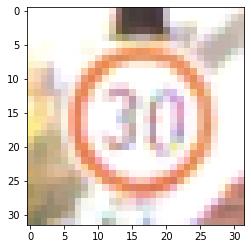

In [44]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [49]:
np.argmax( y_pred_prob[400] )

1

In [50]:
labels_dict[ np.argmax( y_pred_prob[400] ) ]

'Speed limit (30km/h)'

In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis = 1)

  return scoring(y_test_norm, y_pred)




In [54]:
predict(model_trained, X_test, y_test)


0.8215419501133787

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)


In [56]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])


train_and_predict( get_cnn_v2(input_shape, num_classes) )


Epoch 1/5
272/272 [==============================] - 6s 24ms/step - loss: 4.9262 - accuracy: 0.3392 - val_loss: 1.1580 - val_accuracy: 0.6973
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.9951 - accuracy: 0.7007 - val_loss: 0.3594 - val_accuracy: 0.9140
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.5480 - accuracy: 0.8351 - val_loss: 0.1538 - val_accuracy: 0.9643
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.3575 - accuracy: 0.8914 - val_loss: 0.1080 - val_accuracy: 0.9794
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2515 - accuracy: 0.9229 - val_loss: 0.0521 - val_accuracy: 0.9877


0.8956916099773242

In [57]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])


train_and_predict( get_cnn_v3(input_shape, num_classes) )


Epoch 1/5
272/272 [==============================] - 10s 37ms/step - loss: 2.2170 - accuracy: 0.5536 - val_loss: 0.2704 - val_accuracy: 0.9431
Epoch 2/5
272/272 [==============================] - 10s 36ms/step - loss: 0.4073 - accuracy: 0.8824 - val_loss: 0.1072 - val_accuracy: 0.9754
Epoch 3/5
272/272 [==============================] - 10s 36ms/step - loss: 0.2180 - accuracy: 0.9378 - val_loss: 0.0383 - val_accuracy: 0.9917
Epoch 4/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1563 - accuracy: 0.9542 - val_loss: 0.0257 - val_accuracy: 0.9948
Epoch 5/5
272/272 [==============================] - 10s 36ms/step - loss: 0.1082 - accuracy: 0.9684 - val_loss: 0.0171 - val_accuracy: 0.9960


0.9741496598639455

In [58]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])


train_and_predict( get_cnn_v4(input_shape, num_classes) )
# get_cnn_v4(input_shape, num_classes).summary()

Epoch 1/5
272/272 [==============================] - 13s 46ms/step - loss: 2.6186 - accuracy: 0.2962 - val_loss: 0.9826 - val_accuracy: 0.7199
Epoch 2/5
272/272 [==============================] - 12s 44ms/step - loss: 0.8267 - accuracy: 0.7413 - val_loss: 0.2046 - val_accuracy: 0.9402
Epoch 3/5
272/272 [==============================] - 12s 44ms/step - loss: 0.3682 - accuracy: 0.8859 - val_loss: 0.0843 - val_accuracy: 0.9770
Epoch 4/5
272/272 [==============================] - 12s 44ms/step - loss: 0.2232 - accuracy: 0.9328 - val_loss: 0.0512 - val_accuracy: 0.9851
Epoch 5/5
272/272 [==============================] - 12s 44ms/step - loss: 0.1714 - accuracy: 0.9496 - val_loss: 0.0312 - val_accuracy: 0.9913


0.9687074829931973

In [61]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    
    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])


train_and_predict( get_cnn_v5(input_shape, num_classes) )
# get_cnn_v5(input_shape, num_classes).summary()

Epoch 1/5
272/272 [==============================] - 13s 47ms/step - loss: 2.4773 - accuracy: 0.3243 - val_loss: 0.9569 - val_accuracy: 0.7158
Epoch 2/5
272/272 [==============================] - 13s 46ms/step - loss: 0.7854 - accuracy: 0.7495 - val_loss: 0.2247 - val_accuracy: 0.9312
Epoch 3/5
272/272 [==============================] - 13s 46ms/step - loss: 0.4038 - accuracy: 0.8713 - val_loss: 0.1255 - val_accuracy: 0.9591
Epoch 4/5
272/272 [==============================] - 13s 46ms/step - loss: 0.2726 - accuracy: 0.9147 - val_loss: 0.0607 - val_accuracy: 0.9832
Epoch 5/5
272/272 [==============================] - 13s 46ms/step - loss: 0.2094 - accuracy: 0.9375 - val_loss: 0.0438 - val_accuracy: 0.9875


0.9585034013605442

In [62]:
X_train[0].shape

(32, 32, 3)

In [63]:
color.rgb2gray( X_train[0] ).shape

(32, 32)

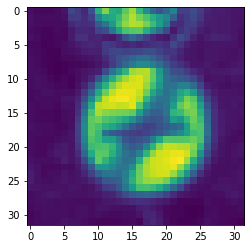

In [64]:
plt.imshow( color.rgb2gray( X_train[0] ) )

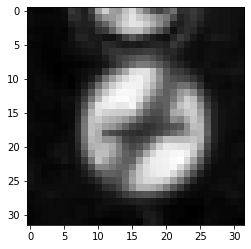

In [65]:
plt.imshow( color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray') )

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1, 32, 32, 1)

In [70]:
model = get_cnn_v5((32, 32, 1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={} )
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 13s 47ms/step - loss: 2.4085 - accuracy: 0.3068 - val_loss: 0.6677 - val_accuracy: 0.7870
Epoch 2/5
272/272 [==============================] - 12s 46ms/step - loss: 0.5431 - accuracy: 0.8218 - val_loss: 0.1074 - val_accuracy: 0.9703
Epoch 3/5
272/272 [==============================] - 12s 46ms/step - loss: 0.2389 - accuracy: 0.9218 - val_loss: 0.0555 - val_accuracy: 0.9849
Epoch 4/5
272/272 [==============================] - 13s 46ms/step - loss: 0.1501 - accuracy: 0.9532 - val_loss: 0.0244 - val_accuracy: 0.9934
Epoch 5/5
272/272 [==============================] - 12s 46ms/step - loss: 0.1095 - accuracy: 0.9659 - val_loss: 0.0168 - val_accuracy: 0.9957


0.9784580498866213

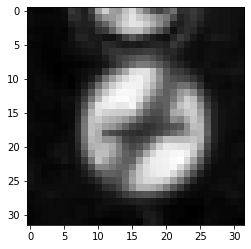

In [71]:
plt.imshow( color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray') )

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:, :, 2] = exposure.equalize_adapthist(hsv[:, :, 2])
  img = color.hsv2rgb(hsv)

  return img

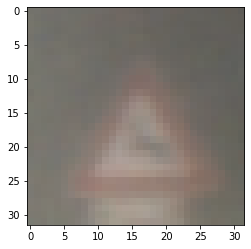

In [73]:
plt.imshow( X_train[400])

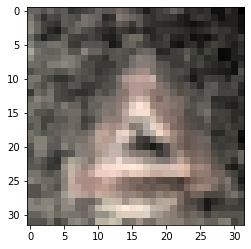

In [74]:
plt.imshow( preproc_img(X_train[400]))